<a href="https://colab.research.google.com/github/adityapatil4141/Retail-Store-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Aditya Patil**

# **Project Summary -**

This dataset is a live dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem. In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.adaboost and Xgboost).

# **GitHub Link -**

https://github.com/adityapatil4141/Retail-Store-Prediction

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [568]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
colors = sns.color_palette(palette='Set1')

### Dataset Loading

In [569]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [570]:
# Load Dataset
df_sales = pd.read_csv("/content/drive/MyDrive/work files /Retail Sales Prediction/Rossmann Stores Data.csv")
df_store = pd.read_csv("/content/drive/MyDrive/work files /Retail Sales Prediction/store.csv")

<ipython-input-570-dbab997a2f6a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv("/content/drive/MyDrive/work files /Retail Sales Prediction/Rossmann Stores Data.csv")


### Dataset First View

In [571]:
# Dataset First Look
# dataset - Rossman Store:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [572]:
# Dataset - Store:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [573]:
# Dataset Rows & Columns count
print('shape of rossman dataset = ',df_sales.shape )
print('shape of store dataset = ',df_store.shape )

shape of rossman dataset =  (1017209, 9)
shape of store dataset =  (1115, 10)


### Dataset Information

In [574]:
# Dataset Info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [575]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [576]:
# Dataset Duplicate Value Count
print('no. of duplicates in rossman store dataset = ',df_sales.duplicated().sum())
print('no. of duplicates in store dataset = ',df_store.duplicated().sum())

no. of duplicates in rossman store dataset =  0
no. of duplicates in store dataset =  0


#### Missing Values/Null Values

In [577]:
# Missing Values/Null Values Count
print('no. of missing values in Rossman store dataset = ',df_sales.isnull().sum())
print('no. of missing values in store dataset = ',df_store.isnull().sum())

no. of missing values in Rossman store dataset =  Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
no. of missing values in store dataset =  Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<Axes: >

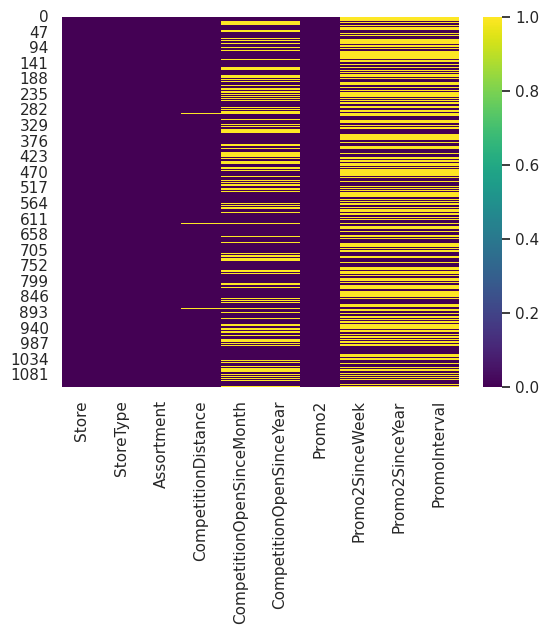

In [578]:
# Visualizing the missing values
sns.heatmap(data=df_store.isnull(),cmap='viridis',cbar='False')

### What did you know about your dataset?

There are 2 datasets provided. One dataset is of Rossman Store and another is Store dataset.

Rossman Store dataset has 1017209 rows and 9 columns. whereas store dataset is of 1115 rows and 10 columns.

Both dataset has 0 duplicate values.

Rossman store dataset has no missing values whereas Store dataset has missing values

## ***2. Understanding Your Variables***

In [579]:
# Dataset Columns
df_sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [580]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [581]:
# Dataset Describe
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [582]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [583]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [584]:
# Write your code to make your dataset analysis ready.
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [585]:
# Calculating null values from the store dataset:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [586]:
# Filling null values of store dataset:
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(0)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(0)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].fillna(0)
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].fillna(0)
df_store['PromoInterval'] = df_store['PromoInterval'].fillna(0)
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna(0)

In [587]:
# Recalculating null values of store dataset:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [588]:
# Calculating duplicate values in sales dataset:
df_sales.duplicated().sum()

0

In [589]:
# Converting Date column from sales data into datetime format
df_sales.Date = pd.to_datetime(df_sales.Date)

In [590]:
# Getting Month and Year column from Date column:
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Year'] = df_sales['Date'].dt.year

In [591]:
# Dataset:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [592]:
# Merging both store and sales dataset in new dataset:
df = pd.merge(df_sales,df_store,on='Store')

In [593]:
# New dataset look:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [594]:
# Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Month                      1017209 non-null  int64         
 10  Year                       1017209 non-null  int64         
 11  StoreType                  1017209 no

In [595]:
df.StateHoliday=df.StateHoliday.astype('string')

In [596]:
df.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [597]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['StateHoliday'] = le.fit_transform(df['StateHoliday'])
df['StoreType'] = le.fit_transform(df['StoreType'])
df['Assortment'] = le.fit_transform(df['Assortment'])


In [598]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0


In [599]:
df.PromoInterval.unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [600]:
df['CompetitionDistance'] =df['CompetitionDistance'].astype(int)
df['CompetitionOpenSinceMonth'] =df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] =df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceWeek'] =df['Promo2SinceWeek'].astype(int)
df['Promo2SinceYear'] =df['Promo2SinceYear'].astype(int)

### What all manipulations have you done and insights you found?

1. Calculated null values,
2. Filled Null values,
3. Calculated duplicate values,
4. Converted Date column in datetime format,
5. Created 2 new column - Month and Year,
6. Merged both store and sales dataset and formed new dataset(df).
7. Transformed columns using label encoder
8. Converted object dtype in integer

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [601]:
# Chart - 1 visualization code
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


<Axes: xlabel='Customers', ylabel='Sales'>

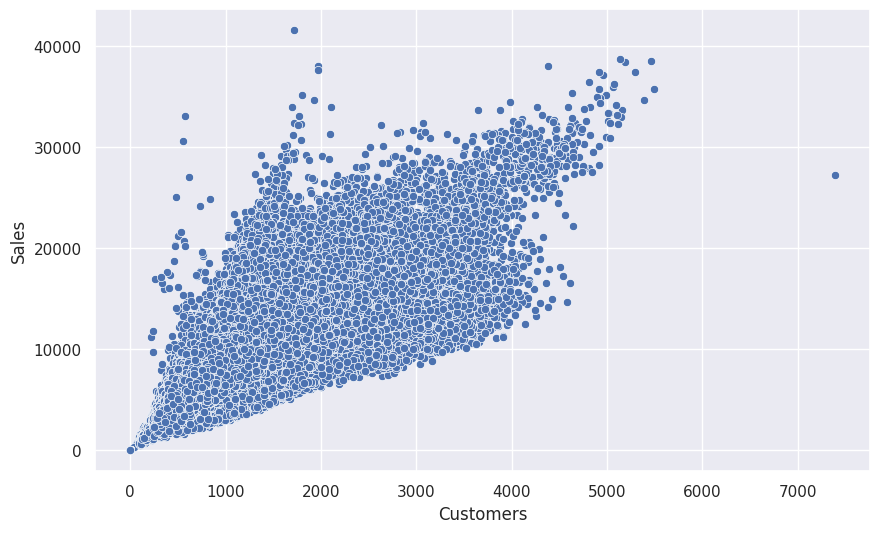

In [602]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sales,x=df_sales['Customers'],y=df_sales['Sales'])

##### 1. Why did you pick the specific chart?

I wanted to see behaviour of sales and customers.

##### 2. What is/are the insight(s) found from the chart?

As the customer increases, sales increases

#### Chart - 2

<Axes: xlabel='count', ylabel='StateHoliday'>

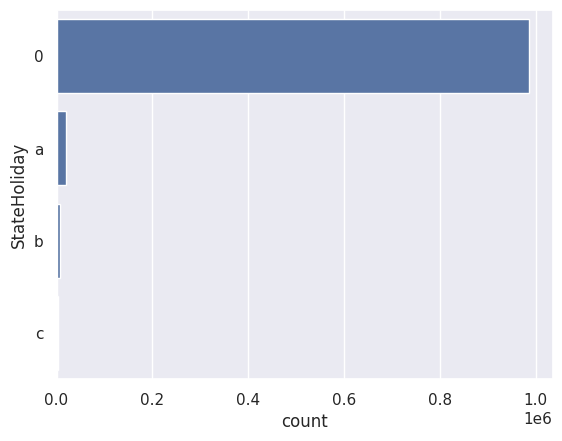

In [603]:
# Chart - 2 visualization code
sns.countplot(df_sales['StateHoliday'])

##### 1. Why did you pick the specific chart?

Wanted to see total count of holidays that have been given.

##### 2. What is/are the insight(s) found from the chart?

Count of NONE (no holiday) is more than other holidays

#### Chart - 3

In [604]:
# Chart - 3 visualization code
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [605]:
df_sales.SchoolHoliday.unique()

array([1, 0])

<Axes: >

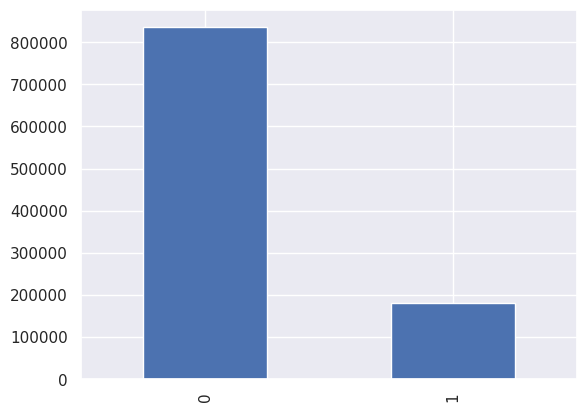

In [606]:
df_sales.SchoolHoliday.value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

Wanted to see how many school holidays are there.

##### 2. What is/are the insight(s) found from the chart?

Count if no school holidays is more.

#### Chart - 4

In [607]:
# Chart - 4 visualization code
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [608]:
customers_per_year = df_sales.groupby('Year')['Customers'].sum().sort_values(ascending=False).reset_index().set_index('Year')

In [609]:
customers_per_year

,Customers
Year,
2013,256004425
2014,240488971
2015,147548359


<Axes: xlabel='Year'>

<Figure size 1000x600 with 0 Axes>

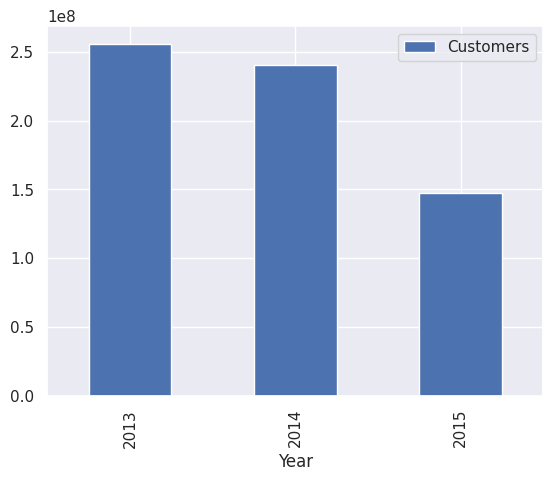

In [610]:
plt.figure(figsize=(10,6))
customers_per_year.plot(kind='bar')

##### 1. Why did you pick the specific chart?

Wanted to see yearwise customers response

##### 2. What is/are the insight(s) found from the chart?

Customers response is decreasing

#### Chart - 5

In [611]:
# Chart - 5 visualization code
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [612]:
month_customers = df_sales.groupby(['Year','Month'])['Customers'].sum().reset_index().set_index('Month').sort_values(by=['Customers','Month'],ascending=False)
month_customers

,Year,Customers
Month,,
12,2013,23879341
7,2013,22872045
8,2013,22314232
7,2015,22253888
3,2013,21969462
3,2015,21809641
6,2015,21645129
11,2013,21543868
5,2014,21505750


In [613]:
month_customers_visual=month_customers = df_sales.groupby(['Year','Month'])['Customers'].sum().reset_index().set_index('Month').sort_values(by=['Year','Month'],ascending=True)


<Figure size 1000x600 with 0 Axes>

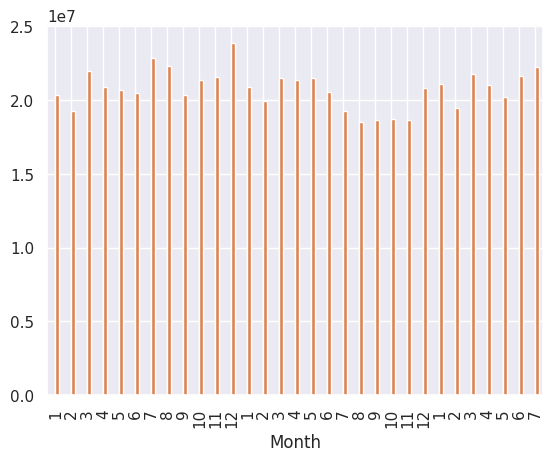

In [614]:
plt.figure(figsize=(10,6))
month_customers_visual.plot(kind='bar')
plt.legend().set_visible(False)

##### 1. Why did you pick the specific chart?

Wanted to see which month in a year has most number of customers.

##### 2. What is/are the insight(s) found from the chart?

12th month of year 2013 has recorded highest customers

#### Chart - 6

In [615]:
# Chart - 6 visualization code
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [616]:
sales_year = df_sales.groupby('Year')['Sales'].sum().reset_index().set_index('Year').sort_values(by='Sales',ascending=False)
sales_year

,Sales
Year,
2013,2302876084
2014,2180804896
2015,1389499643


<Axes: xlabel='Year'>

<Figure size 1000x600 with 0 Axes>

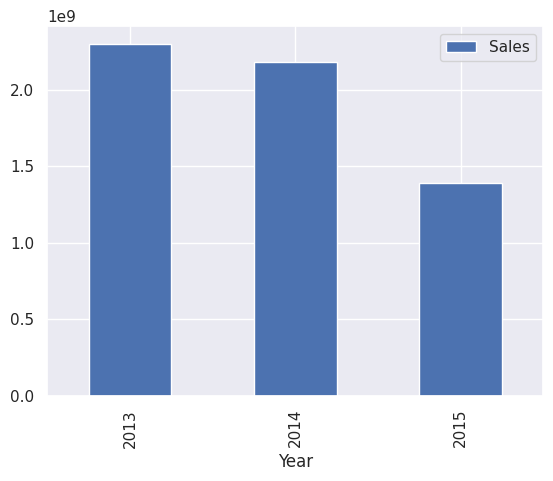

In [617]:
plt.figure(figsize=(10,6))
sales_year.plot(kind='bar')

##### 1. Why did you pick the specific chart?

Wanted to know which year has highest sales.

##### 2. What is/are the insight(s) found from the chart?

Year 2013 has highest amount of sales.

#### Chart - 7

In [618]:
# Chart - 7 visualization code'
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [619]:
sales_year_month = df_sales.groupby(['Year','Month'])['Sales'].sum().reset_index().set_index('Month').sort_values(by=['Year','Month'],ascending=True)
sales_year_month

,Year,Sales
Month,,
1,2013,180132207
2,2013,171534275
3,2013,201180369
4,2013,183431432
5,2013,185411063
6,2013,180702351
7,2013,208843882
8,2013,198042727
9,2013,178053963


<Axes: xlabel='Month'>

<Figure size 1000x600 with 0 Axes>

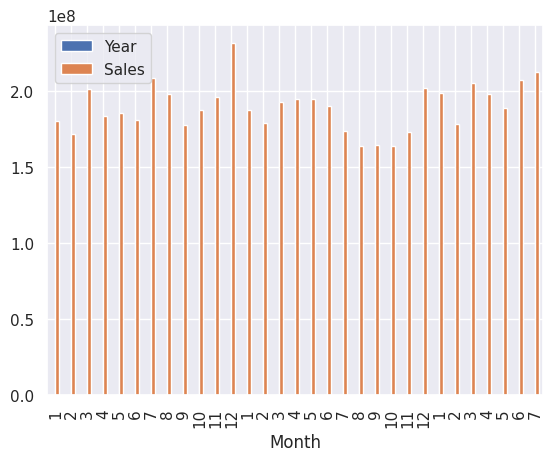

In [620]:
plt.figure(figsize=(10,6))
sales_year_month.plot(kind='bar')

In [621]:
max_sales_month_year = sales_year_month[sales_year_month['Sales']==sales_year_month['Sales'].max()]
max_sales_month_year

,Year,Sales
Month,,
12,2013,231710561


##### 1. Why did you pick the specific chart?

Wanted to know year and month wise sales

##### 2. What is/are the insight(s) found from the chart?

12th month of year 2013 has recorded highest amount of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [622]:
# Chart - 8 visualization code

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

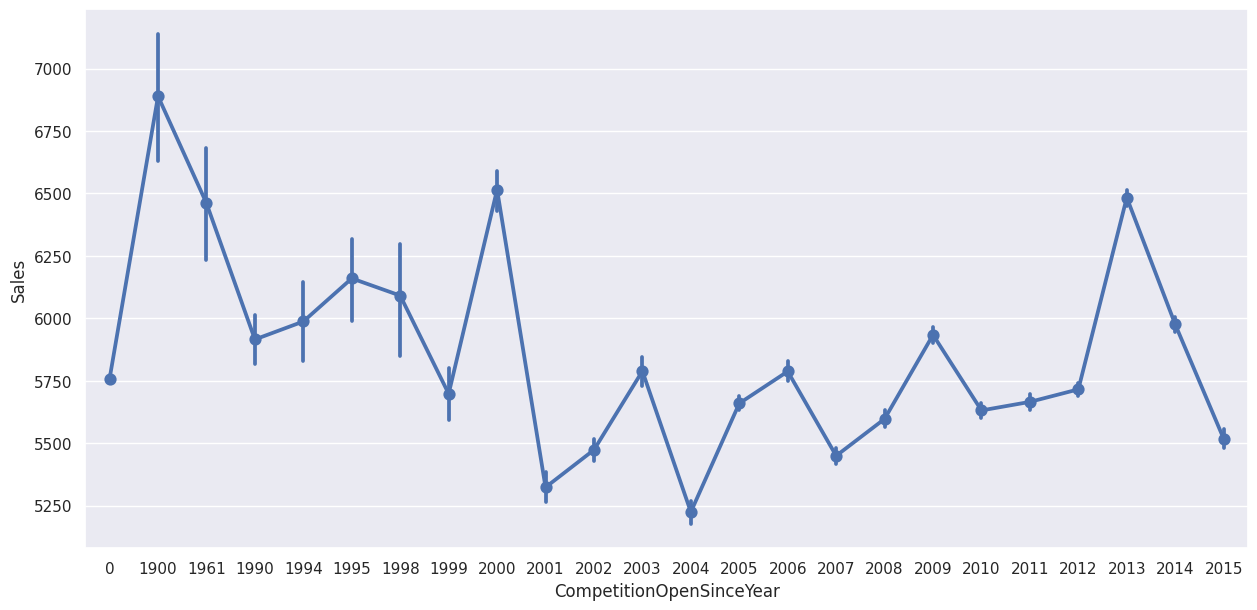

In [623]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='CompetitionOpenSinceYear',y='Sales')

##### 1. Why did you pick the specific chart?

wanted to see sales behaviors over years

##### 2. What is/are the insight(s) found from the chart?

sales were high in 1990 and is slightly decreasing since then

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

in 1990 there was low competition and now as the competition has increased the sales have gotten down.

#### Chart - 9

In [624]:
# Chart - 9 visualization code

In [625]:
df.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

<Axes: xlabel='DayOfWeek', ylabel='count'>

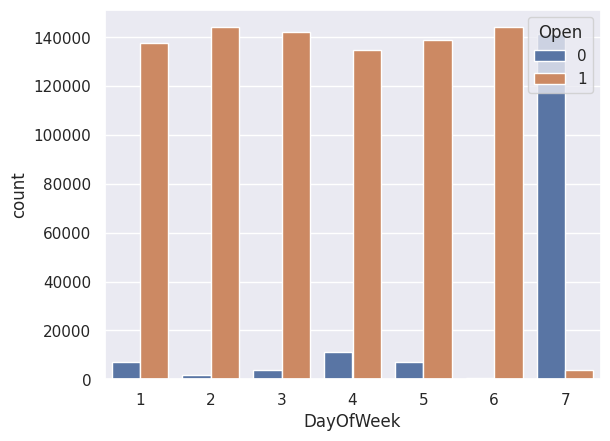

In [626]:
sns.countplot(x=df.DayOfWeek,hue=df['Open'])

##### 1. Why did you pick the specific chart?

Wanted to see how many stores were open according to days of week

##### 2. What is/are the insight(s) found from the chart?

Many stores were open during monday-saturday and many stores were closed during sunday.

Answer Here

#### Chart - 10

In [627]:
# Chart - 10 visualization code
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


<Axes: xlabel='SchoolHoliday', ylabel='count'>

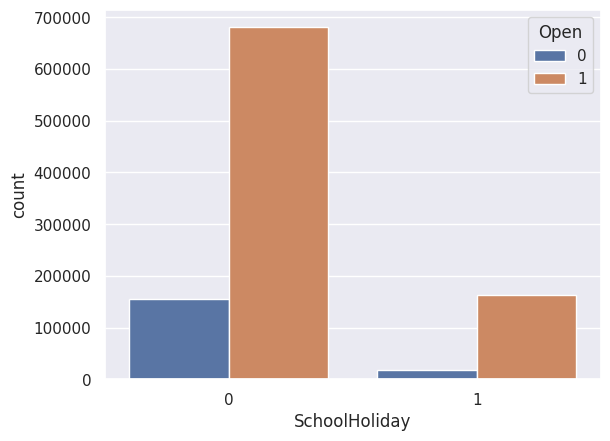

In [628]:
sns.countplot(x=df.SchoolHoliday,hue=df['Open'])

##### 1. Why did you pick the specific chart?

Wanted to see how many stores were open on school holidays and how many were closed

##### 2. What is/are the insight(s) found from the chart?

Many stores open on the day when there is no school holiday.

#### Chart - 11

In [629]:
# Chart - 11 visualization code
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


<ipython-input-630-815ccf0a2eb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Promo,y=df.Sales,palette='viridis')


<Axes: xlabel='Promo', ylabel='Sales'>

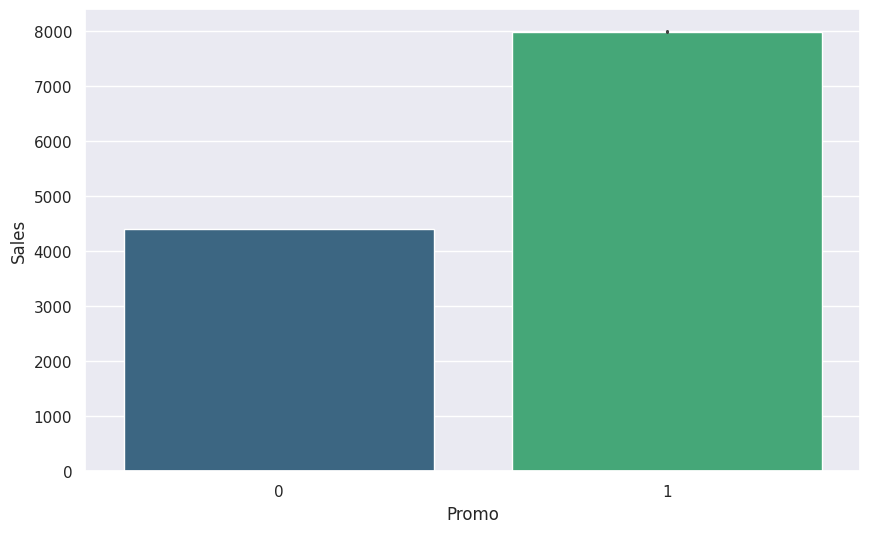

In [630]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.Promo,y=df.Sales,palette='viridis')

##### 1. Why did you pick the specific chart?

Wanted to see does promotion makes any difference on sales.

##### 2. What is/are the insight(s) found from the chart?

0 represents the stores who have not done promotion and 1 represents the stores that have done promotions. we can see that the store who have done promotion has made huge sales.

#### Chart - 12

In [631]:
# Chart - 12 visualization code
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


In [632]:
df.Sales.unique()

array([ 5263,  5020,  4782, ..., 20362, 18841, 21237])

<Axes: xlabel='StoreType', ylabel='Sales'>

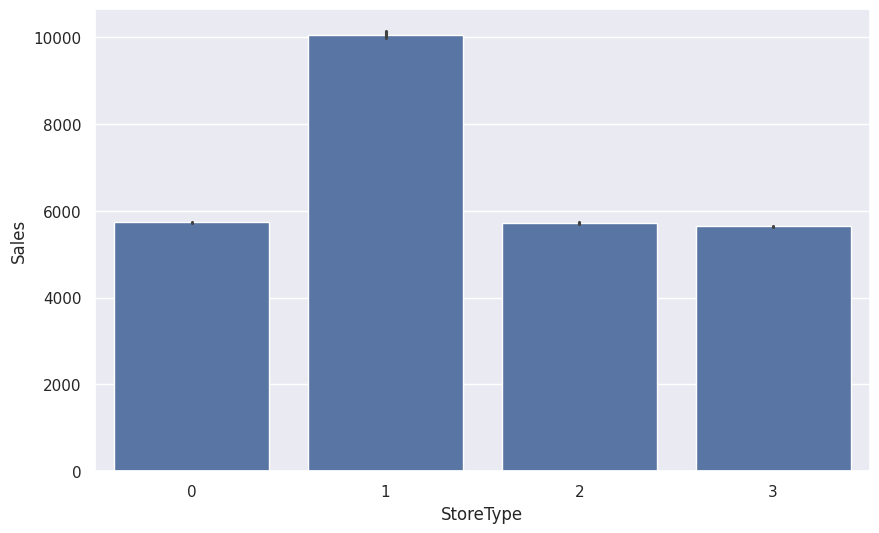

In [633]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.StoreType,y=df.Sales)

##### 1. Why did you pick the specific chart?

Wanted to see storetype wise sales.

##### 2. What is/are the insight(s) found from the chart?

Store type 1 has the highest sales and all other store type has same sales more or less.

#### Chart - 13

In [634]:
# Chart - 13 visualization code\
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


<ipython-input-635-798763611380>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.StateHoliday,y=df.Sales,palette='viridis')


<Axes: xlabel='StateHoliday', ylabel='Sales'>

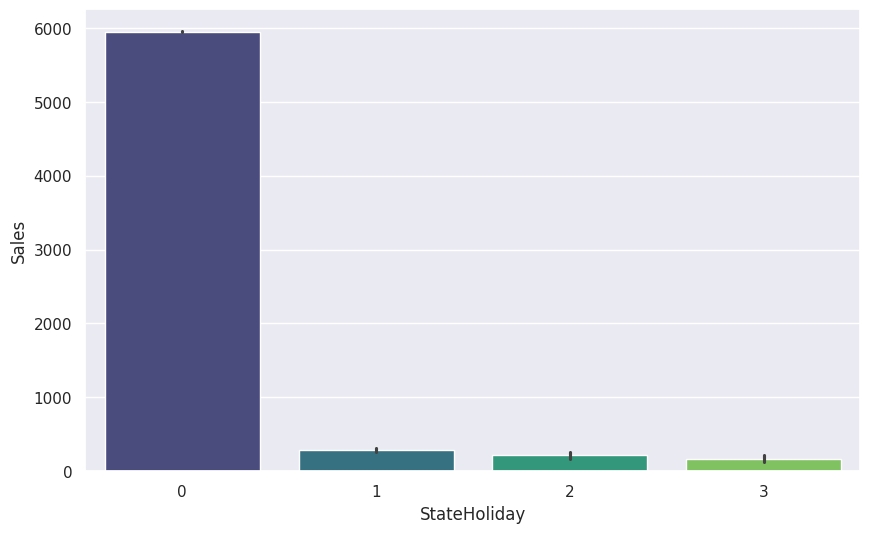

In [635]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.StateHoliday,y=df.Sales,palette='viridis')

##### 1. Why did you pick the specific chart?

Wanted to see holiday wise sales.

##### 2. What is/are the insight(s) found from the chart?

Most sales are recorded whene there is no holiday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-636-d7a6ead6518e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()),annot=True,cmap='Reds',fmt='.2f',linewidths=2)


<Axes: >

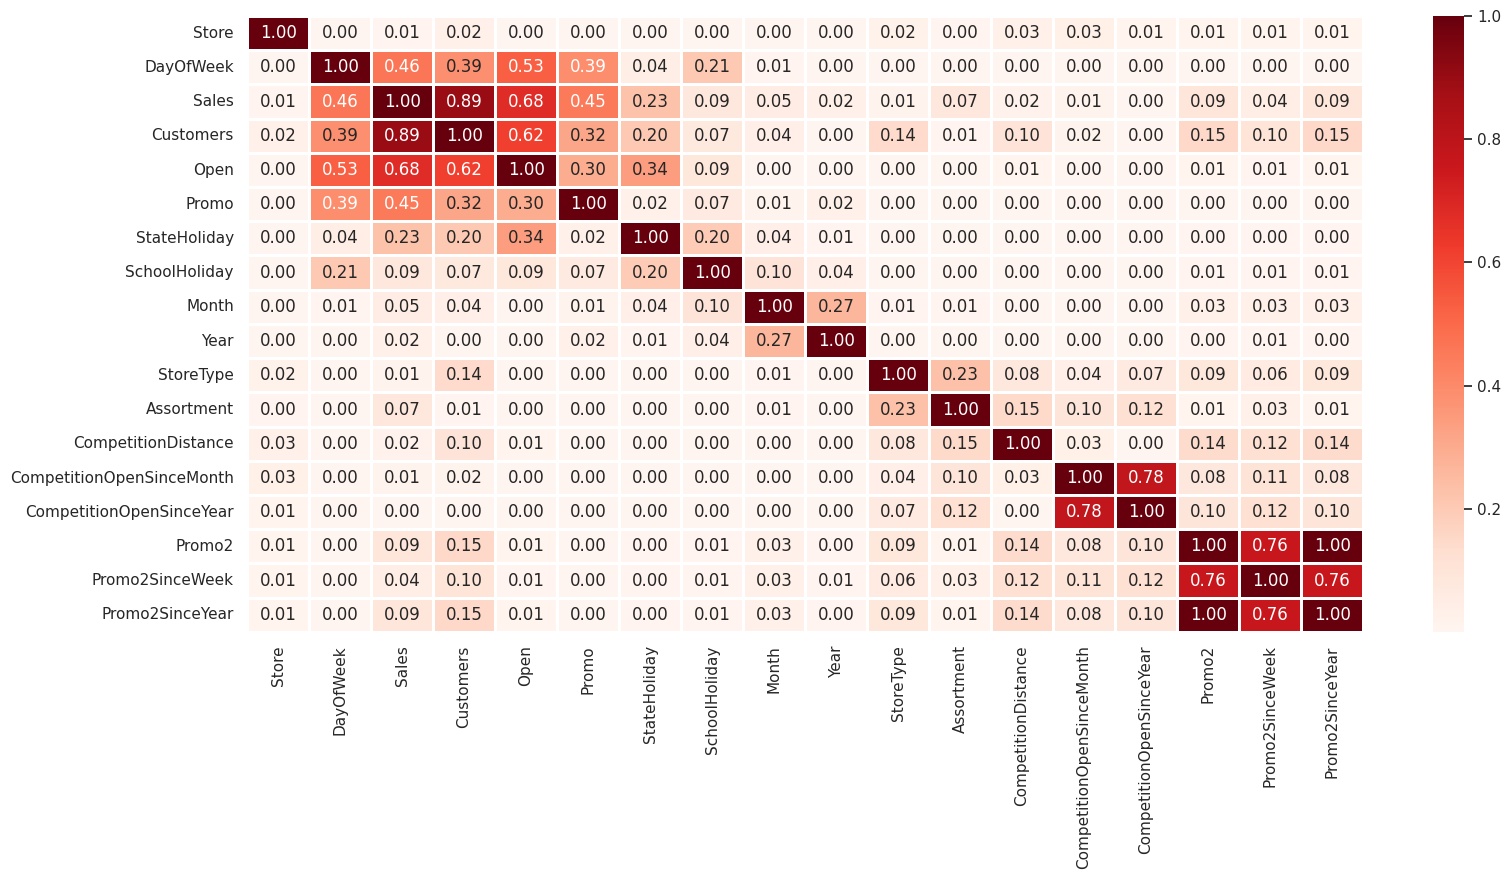

In [636]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,8))
sns.heatmap(abs(df.corr()),annot=True,cmap='Reds',fmt='.2f',linewidths=2)

#### Chart - 15

<Axes: xlabel='DayOfWeek', ylabel='count'>

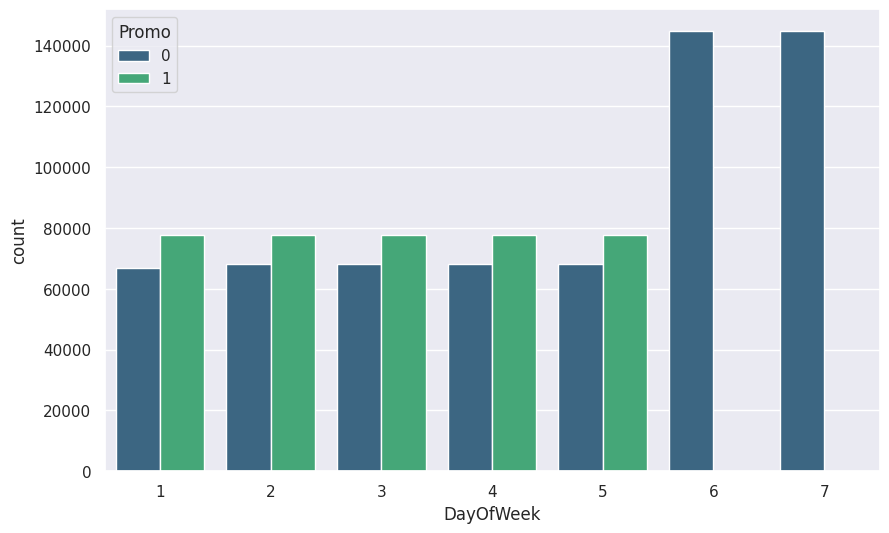

In [637]:
# Pair Plot visualization code
plt.figure(figsize=(10,6))
sns.countplot(x=df.DayOfWeek,hue=df.Promo,palette='viridis')

##### 1. Why did you pick the specific chart?

To see how do week wise promotion behaviour

##### 2. What is/are the insight(s) found from the chart?

Promotions are mostly done on weekdays and no store does promotion during weekends

## ***6. Feature Engineering & Data Pre-processing***

In [638]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Month                        0
Year                         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [639]:
# Handling Outliers & Outlier treatments
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


In [640]:
# Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif = pd.DataFrame()
  vif['Variables'] = x.columns
  vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [641]:
calc_vif(df[[i for i in df.describe().columns if i not in df.Sales]])

,Variables,VIF
0,Store,4.031351e+00
1,DayOfWeek,8.399299e+00
2,Sales,2.460109e+01
3,Customers,1.782222e+01
4,Open,1.421294e+01
5,Promo,2.297450e+00
6,StateHoliday,1.319320e+00
7,SchoolHoliday,1.338215e+00
8,Month,4.167221e+00
9,Year,3.839610e+01


In [642]:
# We can see that Promo2 and Promo3SinceYear has higher VIF so we will drop either of the column from them.

In [643]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Promo2']]])

,Variables,VIF
0,Store,4.024680
1,DayOfWeek,8.352143
2,Customers,5.277838
3,Open,13.411953
4,Promo,1.993487
5,StateHoliday,1.313431
6,SchoolHoliday,1.337997
7,Month,4.150229
8,Year,38.300350
9,StoreType,1.964062


In [644]:
# Now VIF factor is less than 10, which is a good sign for ml model

<Axes: xlabel='Sales', ylabel='Count'>

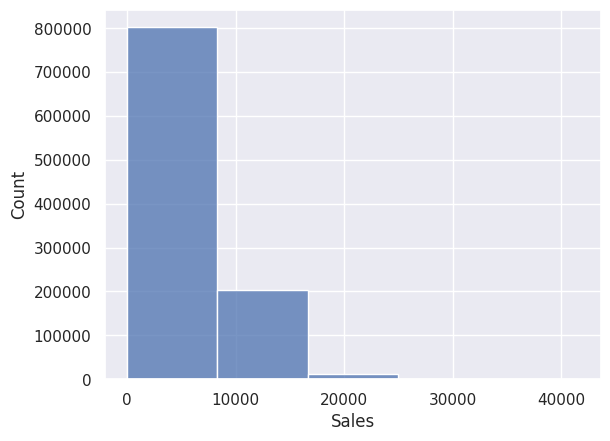

In [645]:
# Analysis on Sales column:
sns.histplot(df['Sales'],bins=5)

In [646]:
# Drop those stores who has done 0 sales, assuming that stores may be closed on that day.
# Creating new dataframe which excludes 'sales=0'
new_df = df.drop(df[(df['Open']==0 & (df['Sales']==0))].index)

In [647]:
# Rechecking:
df[(df['Open']==0 & (df['Sales']==0))]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
5,1,7,2015-07-26,0,0,0,0,0,0,7,2015,2,0,1270,9,2008,0,0,0,0
12,1,7,2015-07-19,0,0,0,0,0,0,7,2015,2,0,1270,9,2008,0,0,0,0
19,1,7,2015-07-12,0,0,0,0,0,0,7,2015,2,0,1270,9,2008,0,0,0,0
26,1,7,2015-07-05,0,0,0,0,0,0,7,2015,2,0,1270,9,2008,0,0,0,0
33,1,7,2015-06-28,0,0,0,0,0,0,6,2015,2,0,1270,9,2008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,7,2013-01-27,0,0,0,0,0,0,1,2013,3,2,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec"
1017189,1115,7,2013-01-20,0,0,0,0,0,0,1,2013,3,2,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec"
1017196,1115,7,2013-01-13,0,0,0,0,0,0,1,2013,3,2,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec"
1017203,1115,7,2013-01-06,0,0,0,0,0,1,1,2013,3,2,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec"


In [648]:
# New df shape
new_df.shape

(844392, 20)

In [649]:
# Converting PromoInterval into object format:
df['PromoInterval']=df['PromoInterval'].astype('string')

In [689]:
from sklearn.preprocessing import OneHotEncoder
ohe =OneHotEncoder(sparse=False)
xx = ohe.fit_transform(df[['PromoInterval']])
one_hot_df = pd.DataFrame(xx, columns=ohe.get_feature_names_out(['PromoInterval']))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [690]:
result_df = pd.concat([df, one_hot_df], axis=1)


In [691]:
result_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,7,...,9,2008,0,0,0,0,1.0,0.0,0.0,0.0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,...,9,2008,0,0,0,0,1.0,0.0,0.0,0.0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,...,9,2008,0,0,0,0,1.0,0.0,0.0,0.0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,...,9,2008,0,0,0,0,1.0,0.0,0.0,0.0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,...,9,2008,0,0,0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,1,...,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,1,...,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,1,...,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,1,...,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0


In [651]:

new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [652]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,7,2015,2,0,1270,9,2008,0,0,0,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [653]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [654]:
# Expand Contraction

#### 2. Lower Casing

In [655]:
# Lower Casing

#### 3. Removing Punctuations

In [656]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [657]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [658]:
# Remove Stopwords

In [659]:
# Remove White spaces

#### 6. Rephrase Text

In [660]:
# Rephrase Text

#### 7. Tokenization

In [661]:
# Tokenization

#### 8. Text Normalization

In [662]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [663]:
# POS Taging

#### 10. Text Vectorization

In [664]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [665]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [666]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [667]:
# Transform Your data

### 6. Data Scaling

In [668]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [669]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [670]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [671]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [672]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [673]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [674]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [675]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [676]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [677]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [678]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [679]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [680]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [681]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***